In [2]:
import xarray as xr
import salem
from glob import glob
import numpy as np
from pathlib import Path

In [3]:
data = Path("data/era5/era5_galapagos.nc4")

In [42]:
ds = xr.open_dataset(data)
ds = ds[{'expver': 0}]

In [43]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 13, time: 515)
Coordinates:
  * longitude  (longitude) float32 -92.0 -91.75 -91.5 ... -89.5 -89.25 -89.0
  * latitude   (latitude) float32 1.2 0.95 0.7 0.45 ... -1.05 -1.3 -1.55 -1.8
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-11-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-13 08:20:54 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

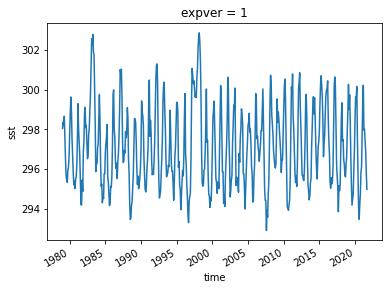

In [44]:
ds.sst.mean(('latitude', 'longitude')).plot()

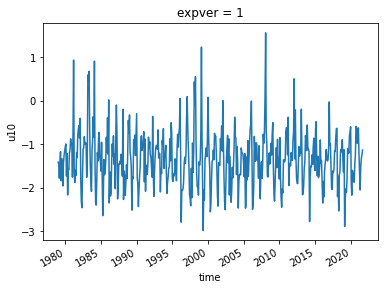

In [56]:
ds.u10.mean(('latitude', 'longitude')).plot()

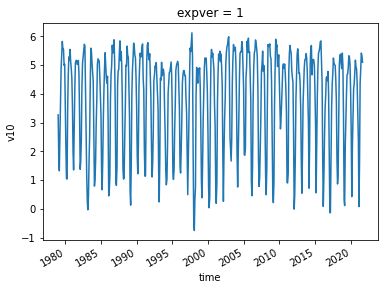

In [57]:
ds.v10.mean(('latitude', 'longitude')).plot()

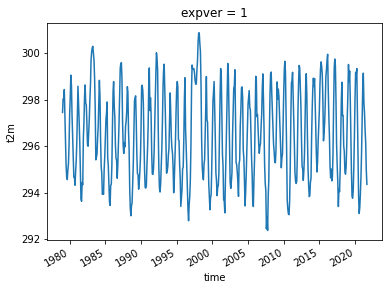

In [58]:
ds.t2m.mean(('latitude', 'longitude')).plot()

list

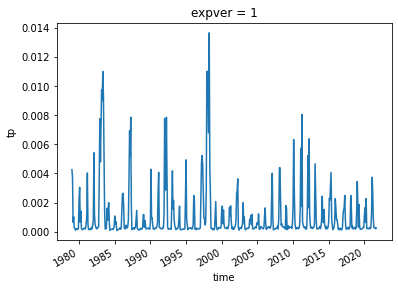

In [176]:
tp = ds.tp.mean(('latitude', 'longitude')).plot()
type(tp)

In [127]:
ds['ws10'] = np.sqrt(ds.u10**2 + ds.v10**2 )

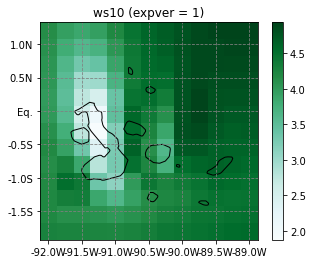

In [159]:
ds.ws10.mean('time').salem.quick_map(cmap='BuGn')

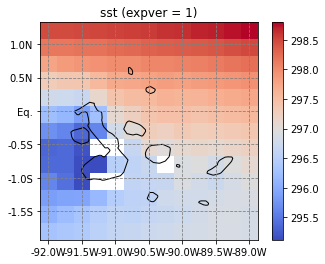

In [166]:
ds.sst.mean('time').salem.quick_map(cmap='coolwarm')

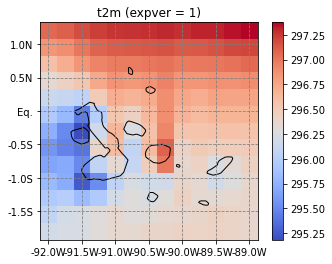

In [167]:
ds.t2m.mean('time').salem.quick_map(cmap='coolwarm')

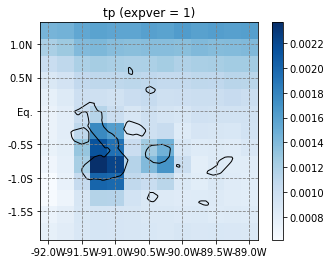

In [170]:
ds.tp.mean('time').salem.quick_map(cmap='Blues')

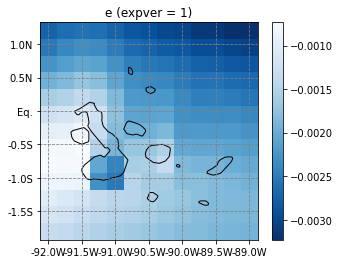

In [173]:
ds.e.mean('time').salem.quick_map(cmap='Blues_r')

In [177]:
monthly_means = ds.groupby("time.month").mean()

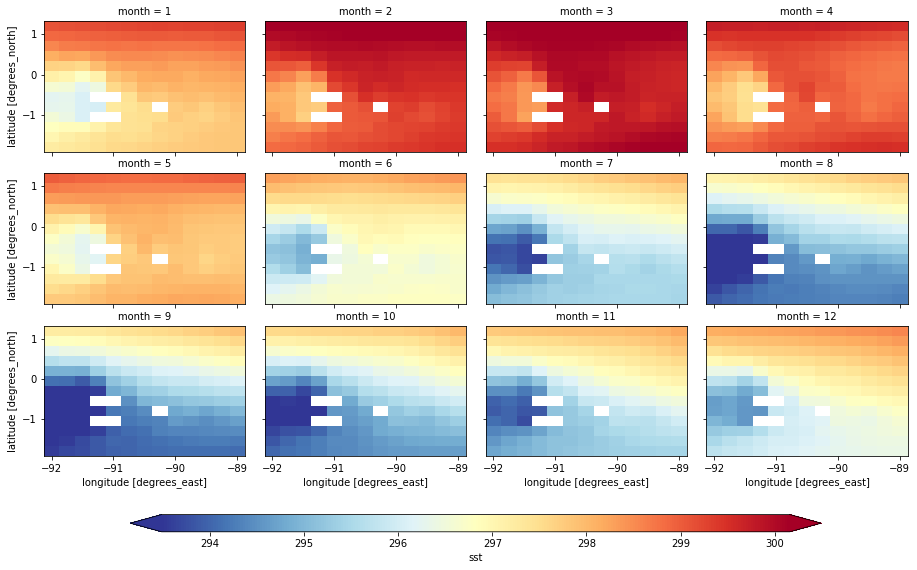

In [180]:
import matplotlib as mpl
fg = monthly_means.sst.plot(
    col="month",
    col_wrap=4,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)